# Assignment #10 - Data Gathering and Warehousing - DSSA-5102

Instructor: Melissa Laurino</br>
Spring 2024</br>

Name: Kahlyll Wilson
</br>
Date: 6 April 2024
<br>
<br>
**At this time in the semester:** <br>
--We have explored a dataset. <br>
--We have cleaned our dataset. <br>
--We created a Github account with a repository for this class and included a Metadata file about our data. <br>
--We introduced general and more advanced SQL syntax, queries, and applications in R.<br>
--Created our own database from scratch in R using libraries RMariaDB and RSQLite <br>
--Populated our databases we created from scratch<br>
--Created a visual enhanced entity relationship diagram for our database.<br>
--Connect to a website using an API. Gather live data from a website using an API.<br>
<br>

**Objective**: Use the collected data to solve a real world problem.<br>
<br>
**iNaturalist**: iNaturalist is a community of citizen scientists that encourages accurate data collection and species identification of the natural world. 
<br>
No observations of captive plants or animals should be included in the iNaturalist data. Research grade observaitons have been verified by the community in terms of species ID, location, etc. Research grade observations have been verified by the community of experts in that field. 
<br>
API's are useful to bridge the gap between manually querying and downloading data, and then uploading them into R/Python, by just working with the live data directly in your platform of choice.

Follow the instructions below to complete the assignment. Answer any questions in markdown cell boxes. Be sure to comment all code.


Learn more about the iNaturalist API: https://api.inaturalist.org/v1/docs/#!/Observations/get_observations_observers<br><br>

R packages for working with iNaturalist API to gather live data:<br>
spocc: https://cran.r-project.org/web/packages/spocc/spocc.pdf <br>
rinat: https://cran.r-project.org/web/packages/rinat/rinat.pdf

In [1]:
#install.packages("spocc", dependencies = TRUE)
#install.packages("rinat")
#install.packages("iNatTools") #Outdated, however, reference documents are still helpful to review.
#install.packages("iNat-API") #Outdated, however, reference documents are still helpful to review. 
#iNat-API IS OUT OF DATE! - It is the original package for accessing iNaturalist data through API.

In [2]:
#Working with json data files generated from the API:
#install.packages("httr")
#install.packages("jsonlite")
#install.packages("tidyverse")
#install.packages("tidyverse")
#install.packages("rinat")
#install.packages("spocc")

#Working with the iNaturalist API packages:
library(rinat)
library(spocc)

#Working with the API obtained data:
library(lubridate)
library(httr)
library(tidyverse)
library(jsonlite)

#Load required libraries
#Only load the database libraries you plan to use to create your database.
library(DBI)
library(RSQLite)
library(spocc)
library(dplyr)
library(ggplot2)


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr   1.1.4     ✔ readr   2.1.4
✔ forcats 1.0.0     ✔ stringr 1.5.0
✔ ggplot2 3.4.3     ✔ tibble  3.2.1
✔ purrr   1.0.2     ✔ tidyr   1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'jsonlite'


The following object is masked from 'package:purrr':

    flatten




## Part 2 - Accessing iNaturalist data through package API

When it comes to R and Python, there are many packages already created by users that save you the time while connecting to an API by connecting with packages instead. This way, you do not need to obtain your access token because you are using a package or an app that has already completed that process. We will continue with iNaturalst for this example. 

**R:** <br>
spocc (https://cran.r-project.org/web/packages/spocc/spocc.pdf) - A programmatic interface to many species occurrence data sources,including Global Biodiversity Information Facility ('GBIF'), 'iNaturalist',
'eBird', Ocean 'Biogeographic' Information System ('OBIS'), and many more! <br><br>
rinat (https://cran.r-project.org/web/packages/rinat/rinat.pdf) - A programmatic interface to the API provided by the 'iNaturalist' website to download species occurrence data submitted by citizen scientists. <br><br>
iNatTools - Outdated and may not work with current versions of R, but resources online using iNatTools may relate to the packages above.<br><br>
**Python:** <br>
pyiNaturalist (https://pypi.org/project/pyinaturalist/0.12.0/) <br>

In [3]:
#Test out rinat:

#Get iNaturalist observations of Harbor porpoises for the year 2024
porpoise = get_inat_obs(query = "Harbour Porpoise", year = 2024)

#How many unique Genus/species scientific names are present within the common name, Harbor Porpoise?
unique(porpoise$scientific_name)

[1] "Phocoena phocoena"          "Phocoena phocoena relicta" 
[3] "Phocoena phocoena phocoena" "Phocoena phocoena vomerina"
[5] "Sabellinae"                 "Eudistylia vancouveri"     
[7] "Dendronotus rufus"

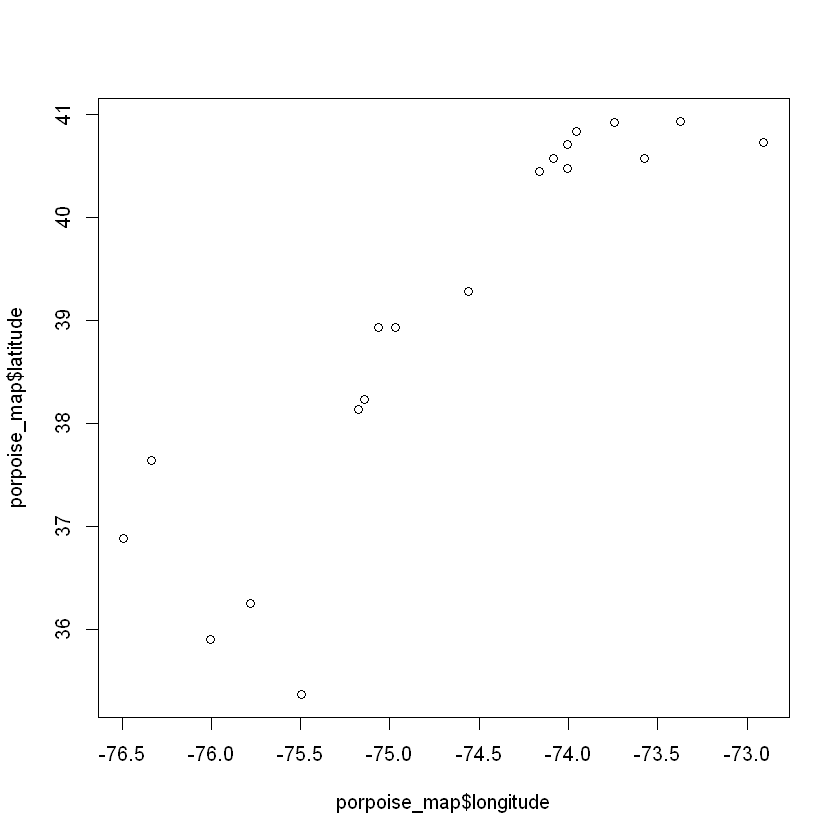

In [4]:
#Let's look at JUST the Southernmost range of Harbor porpoise (New Jersey-North Carolina)

#Bound off Northern and Southern most limit of New Jersey and North Carolina using lattitude and longitude.
bounds = c(33, -78, 41, -69)

#Create a quick plot/map of observations. Not that visually appealing, but it shows our data is available. 
porpoise_map = get_inat_obs(query = "Harbour Porpoise", bounds = bounds)
plot(porpoise_map$longitude, porpoise_map$latitude)

In [5]:
#Download all user observations of porpoise (get_inat_obs(query = "Harbor Porpoise", year = 2024).
user_obs = get_inat_obs_user(porpoise$user_login[1], maxresults = 20)
head(user_obs, 2)

,scientific_name,datetime,description,place_guess,latitude,longitude,tag_list,common_name,url,image_url,⋯,positioning_device,user_id,user_name,created_at,updated_at,quality_grade,license,sound_url,oauth_application_id,captive_cultivated
,<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<chr>,<chr>,⋯,<lgl>,<int>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,Scyliorhinus,2024-04-13 08:52:50 +0100,NA,"Pembrey and Burry Port Town Community, Burry Port, Wales, GB",51.67061,-4.304737,NA,,https://www.inaturalist.org/observations/207161036,,⋯,NA,5638842,NA,2024-04-14 13:33:52 UTC,2024-04-14 13:33:52 UTC,casual,CC-BY-NC,,3,false
2,Phocoena phocoena,2024-04-13 08:44:18 +0100,NA,"Pembrey and Burry Port Town Community, Burry Port, Wales, GB",51.67042,-4.303800,NA,Harbour Porpoise,https://www.inaturalist.org/observations/207145167,https://inaturalist-open-data.s3.amazonaws.com/photos/366377024/medium.jpg,⋯,NA,5638842,NA,2024-04-14 11:35:33 UTC,2024-04-14 15:28:54 UTC,needs_id,CC-BY-NC,,3,false


**STOP HERE**<br>
Using this package, we have a DOWNLOAD limit with their API, How can we possibly get around this? <br>
If you want to explore all of the data iNaturalist has to offer, unfortunetly RiNat is not going to cut it.
RiNat is a good resource for investigating small queries or very specific queries that yield small results.
<br><br>
Let's try a different API wrapper package instead and use it with a different approach:

## Case Study: **Northern Diamondback Terrapins** (_Malaclemys terrapin terrapin_)

Background information:<br>Diamondback terrapins are New Jersey's only species of brackish water turtle. Brackish water has a mixture of both salt water and fresh water. They are commonly found in the back bays and saltmarshes of New Jersey. They can be found from Massachusetts to North Carolina. The females come ashore to nest in the summer months, while the males will not leave the water at all. Coming ashore to nest has consequences and risks for this species that include human-caused mortalities from vehicle strikes and natural predation. Although the males do not leave the water, human-caused mortality due to crab pots and ghost gear remain a huge threat to both sexes for this species of special concern. Up until 2016, terrapins were hunted during their winter hibernation for terrapin soup! <br>
To further the concern for New Jersey's Diamondback terrapin, the species has temperature-dependent sex determination. Studies from research institutes and rehabilitation facilities, like Stockton University, have shown captive eggs that are incubated at a low temperature will produce all male terrapins and captive eggs that are incubated at a high temperature will produce all female terrapins. It is hypothesized that the determination of sexes may only vary by just a few degrees. If this is the case, how will the threat of climate change and the warming salt marshes impact our local population?<br><br>
**Note:** New Jersey's subspecies of terrapin is the NORTHERN Diamondback Terrapin (_Malaclemys terrapin terrapin_) or (_Genus species subspecies_). We want to make sure we are selecting for the taxon_id of the NORTHERN Diamondback Terrapin. <br><br>

### You are a data scientist for a wildlife contracting company, ML Wildlife. 

### ML Wildlife Mission Statement: To pioneer innovative approaches to wildlife management and policy-making through data collection, storage, and analysis. It is the company's goal to create sustainable connections between human activities and the natural world to preserve biodiversity.

#### In a New Jersey town (that will remain unnamed), there is a proposal to begin construction during the Summer of 2024 on a bike path that will run for 2.5 miles through the salt marsh. The bike path will be a raised (7ft) concrete pathway, or seawall, to accomodate for high and low tides to ensure that flooding is not an issue for the path. Water or wildlife (Turtles, fish, crabs, inverts, etc.) can not pass through or under the pathway. Birds can fly over the pathway. Construction is estimated to last four months. The goal of the pathway is to teach people about wildlife by walking through the man-made salt marsh trail. Railings will be placed on either side of the pathway to ensure human safety, but what about the safety of the wildlife?

#### Local environmentalists and biologists are concerned with the proposed bike path, especially for the state's Diamondback terrapin population. Will this bike path create an obstacle that will force more females to cross the roads to lay their eggs? What about the eggs that are laid along the bike bath already from the year before? Will the nests be ruined in the process? In addition to the Diamondback terrapin, additional species also utilize this area for nesting and feeding like the Ipswich Sparrow, which is a subspecies of the Savannah Sparrow that has a very limited range. The saltmarsh serves as an important nursery ground for Atlantic Menhaden, the Mid-Atlantic ecosystem's "Most Important Fish of the Sea."

Your job is to:<br>
--Collect citizen science observations from 2019-2024 in iNaturalist of the Northern Diamondback terrapin using the iNaturalist API with R package, spocc.<br>
--Upload that data into a database either locally or on your MySQL server. <br>
--Use SQL to: <br>
    ----Select for research grade observations only. We only want observations that have been accepted by expert naturalists or scientists that confirm the observation.<br>
    ----Determine the best time of year (Or months or weeks or time of day) for project construction.<br>
    ----Determine what subset of the population (Egg, Juvennile or Adult) you believe would be most impacted. <br>
    ----Determine the general observaiton population demographics, or range, for New Jersey terrrapins.<br>
    ----Explore two other species that inhabit and utilize the saltmarsh (Examples are the Ipswich sparrow, Seaside sparrow, Saltmarsh sparrow, Atlantic menhaden, or the Mud fiddler crab and Eastern Mud snail (What terrapins eat) and hypothesize how they would be impacted by this construction project after you have explored their data. Use the data from these other two species to support your decision below. If you would like to choose another species you can, just be mindful of iNaturalist API limits. I recommend looking at the iNaturalist website and explore the different species before collecting data that you do not need. <br>
    
--Provide your overall determination approving or disproving the project with three visualizations to go along with the queried SQL data. **Breifly state why and include three graphics** - but you do not have to go into too much biology detail and there is no right or wrong answer. <br>
--State two possible reasons for results for error in your visualizations.<br>
<br><br>
_Also note, this is a **mostly** "fictional" case study_ :). <br>

**Background information on the other species:**<br>
Ipswich Sparrow (_Passerculus sandwichensis princeps_) - A subspecies of the Savannah Sparrow. Subspecies can breed independently of the parent species. These birds feed directly in the dunes and saltmarshes. They are not as common as the parent species.<br>
Atlantic Menhaden (_Brevoortia tyrannus_) - A small schooling bait fish less than 10in in length. These fish begin their lives in the back bays and salt marshes. They are the primary food source for many species of marine mammals, birds, sharks, and larger fish. They are harvested commercially by us humans in the Mid-Atlantic to create fertilizer, fish oil, pet food, lip products and many other uses.<br>
Eastern Mud Snail (_Ilyanassa obsoleta_) - Food source to many species of birds and terrapins. The ocean clean up crew - feeds on detritis and other matter. <br>
Mud fiddler crab (_Minuca pugnax_) - Only found on the East Coast of the United States. Like many other animals, it is thought this species is expanding the Northern range due to climate change.

## Gather all the data

How many different species of terrapins were documented worldwide on iNaturalist in the year 2024? 

In [6]:
#This is important to examine because we only want to look at the NORTHERN Diamondback terrapin because that is the species that inhabits New Jersey.
NDBT = get_inat_obs(query = "Diamondback Terrapin", year = 2024)
unique(NDBT$scientific_name)

[1] "Malaclemys terrapin"               "Malaclemys"                       
[3] "Malaclemys terrapin littoralis"    "Malaclemys terrapin rhizophorarum"
[5] "Malaclemys terrapin pileata"       "Malaclemys terrapin terrapin"     
[7] "Malaclemys terrapin macrospilota"  "Malaclemys terrapin centrata"

Our results show there are 8 different species/subspecies of terrapins documented worldwide in 2024. _Malaclemys terrapin terrapin_ are the species we want because they inhabit our area.

To obtain a taxon_id for any species or a place_id from iNaturalist:<br>
--Log in to the account you created <br>
--Hit Explore tab at the top <br>
--Search for ANY species you would like (In our case, it's Northern Diamondback Terrapin)<br>
--The taxon_id for the species is found in the URL: https://www.inaturalist.org/observations?place_id=any&subview=map&**taxon_id=39838**
<br>
--More information on the different attributes you can use to filter the data: https://www.inaturalist.org/pages/annotations

In [7]:
#library(spocc) - We already called this library earlier.
#Taxa variables for functions:

taxon_id = 39838  #Northern Diamondback Terrapin (NDBT) species ID obtained from the URL.

# 41440 - is the id for Phocoena phocoena
# 623433 is the id for ATLANTIC Harbor Porpoise specifically.

Write a function that selects for ANY specific variables to help you answer the questions above. <br>
A great resource is found here for writing a looping function that does not stress out the API: https://eleanor-jackson.com/post/2021-04-06-searching-for-spring/ <br>
<br>
The API call: <br>
"https://api.inaturalist.org/v1/observations?....<br><br>
taxon_id=", taxon_id, "& #I have supplied the taxon ID above for NDBT, but feel free to adjust or explore others to help answer your objectives.<br><br>
place_id=any& #Observation IDs are for ANYWHERE in the world. I specifically chose NDBT because I know they only exist from Massachusetts to North Carolina. So I know I will not be getting millions of rows of data because it is a species with a limited geography.<br>
<br>
d1=2020-01-01& #The date you are collecting observations from. 2020-Present. Earlier dates will take longer processing times. <br>
<br>
per_page=200& #The number of results per query. **NOTE** The iNaturalist API ONLY allows for 200 records at a time. This is why we have a function below to loop every 200 observations.<br>
<br>
order_by=id& #Order by species id<br>
<br>
order=asc& #Ascending order<br>
<br>
id_above=0"<br><br>

**A detailed explanation on these parameters can be found here: https://www.inaturalist.org/pages/search+urls**

Listing multiple taxon ID's:
https://www.inaturalist.org/observations?place_id=any&taxon_ids=85553,26039,47113

Multiple taxa using a List (Define your list beforehand).

You can use lists on iNaturalist to restrict a search to a set of taxa. For example, https://www.inaturalist.org/lists/111820-Chicago-Wilderness-Region-Spring-Wildflowers is a list that is already set up.

Sort by Dates or Randomly

The Identify Filters panel already has options built in to sort by Date Added (default), Date Observed, Date Updated (edited), Faves, or Random. Sorting options are Descending (default) or Ascending.

Two of these options are not available in the Explore filters, but can still be added manually: Date Updated and Random. To add these, use

    order_by=updated_at
    order_by=random

Sorting order is specified by

    order=desc or
    order=asc

Annotations

term_id= - the annotation group

    1=Life Stage, 9=Sex, 12=Plant Phenology, 17=Alive or Dead

term_value_id= - the value within the group

    Life Stage: 2=Adult, 3=Teneral, 4=Pupa, 5=Nymph, 6=Larva, 7=Egg, 8=Juvenile, 16=Subimago
    Sex: 10=Female, 11=Male
    Plant Phenology: 13=Flowering, 14=Fruiting, 15=Flower Budding, 21=No Evidence of Flowering
    Alive or Dead: 18=Alive, 19=Dead, 20=Cannot Be Determined


In [8]:
#Function to get observations:
get_obs = function(max_id){

    #An API call that has "id_above =" at the end
    #Note the specified syntax of adding a variable taxon_id that we defined above
    call = paste("https://api.inaturalist.org/v1/observations?taxon_id=", taxon_id, "&place_id=any&d1=2020-01-01&per_page=200&order_by=id&order=asc&id_above=0", 
                    max_id, sep="")

    #Making the API call, parsing it to JSON (Default data format from the API) and then flatten
    get_call_json = fromJSON(
    content(GET(url = call),as = "text", encoding = "UTF-8"),
    flatten = TRUE)

    #Now we want our JSON data as a data frame that will be easier to work with in R and SQL
    as.data.frame(get_call_json$results)}

In [9]:
#Get the first page of observations:
#Set the max_id to 0
obs = get_obs(max_id = 0)
max_id = max(obs[["id"]])
#Create a list with our first page of results that continues per increasing pages
thisisalist = list(page_1 = obs)
# Starts at page 1
page = 1

#While the number of rows per page is equal to 200 entries, when the rows do not equal 200, the loop will stop.
while (nrow(obs) == 200) {
    # puts the system to sleep for .5 seconds
    Sys.sleep(0.5)
    # page increases by 1
    page = page + 1
    page_count = paste("page", page, sep = "_") #For printing the page_count below
    obs = get_obs(max_id = max_id)
    thisisalist[[page_count]] = obs
    max_id = max(obs[["id"]])
    print(page_count)
    print(max_id)}

[1] "page_2"
[1] 50593369
[1] "page_3"
[1] 51264541
[1] "page_4"
[1] 51715570
[1] "page_5"
[1] 52713217
[1] "page_6"
[1] 79816289
[1] "page_7"
[1] 82700172
[1] "page_8"
[1] 84305339
[1] "page_9"
[1] 86417233
[1] "page_10"
[1] 119514909
[1] "page_11"
[1] 121012796
[1] "page_12"
[1] 122174898
[1] "page_13"
[1] 123721461
[1] "page_14"
[1] 124603259
[1] "page_15"
[1] 129934072
[1] "page_16"
[1] 164995420
[1] "page_17"
[1] 167240713
[1] "page_18"
[1] 169456894
[1] "page_19"
[1] 171592845
[1] "page_20"
[1] 203798682


In [10]:
#Use the list we created above with the loop to bind them all together.
thisisnotalist = bind_rows(thisisalist)
dim(thisisnotalist)

[1] 3926  137

In [11]:
NDBT_obs = mutate(thisisnotalist, 
                observed_on_date = as.Date(observed_on, "%Y-%m-%d"),
                day_of_year = as.numeric(strftime(observed_on_date, format = "%j")))

colnames(NDBT_obs)

[1] "quality_grade"                                 
  [2] "time_observed_at"                              
  [3] "taxon_geoprivacy"                              
  [4] "annotations"                                   
  [5] "uuid"                                          
  [6] "id"                                            
  [7] "cached_votes_total"                            
  [8] "identifications_most_agree"                    
  [9] "species_guess"                                 
 [10] "identifications_most_disagree"                 
 [11] "tags"                                          
 [12] "positional_accuracy"                           
 [13] "comments_count"                                
 [14] "site_id"                                       
 [15] "created_time_zone"                             
 [16] "license_code"                                  
 [17] "observed_time_zone"                            
 [18] "quality_metrics"                               
 [19] "public_positional_accuracy"                    
 [20] "reviewed_by"                                   
 [21] "oauth_application_id"                          
 [22] "flags"                                         
 [23] "created_at"                                    
 [24] "description"                                   
 [25] "time_zone_offset"                              
 [26] "project_ids_with_curator_id"                   
 [27] "observed_on"                                   
 [28] "observed_on_string"                            
 [29] "updated_at"                                    
 [30] "sounds"                                        
 [31] "place_ids"                                     
 [32] "captive"                                       
 [33] "ident_taxon_ids"                               
 [34] "outlinks"                                      
 [35] "faves_count"                                   
 [36] "ofvs"                                          
 [37] "num_identification_agreements"                 
 [38] "comments"                                      
 [39] "map_scale"                                     
 [40] "uri"                                           
 [41] "project_ids"                                   
 [42] "community_taxon_id"                            
 [43] "owners_identification_from_vision"             
 [44] "identifications_count"                         
 [45] "obscured"                                      
 [46] "num_identification_disagreements"              
 [47] "geoprivacy"                                    
 [48] "location"                                      
 [49] "votes"                                         
 [50] "spam"                                          
 [51] "mappable"                                      
 [52] "identifications_some_agree"                    
 [53] "project_ids_without_curator_id"                
 [54] "place_guess"                                   
 [55] "identifications"                               
 [56] "project_observations"                          
 [57] "observation_photos"                            
 [58] "photos"                                        
 [59] "faves"                                         
 [60] "non_owner_ids"                                 
 [61] "observed_on_details.date"                      
 [62] "observed_on_details.day"                       
 [63] "observed_on_details.month"                     
 [64] "observed_on_details.year"                      
 [65] "observed_on_details.hour"                      
 [66] "observed_on_details.week"                      
 [67] "created_at_details.date"                       
 [68] "created_at_details.day"                        
 [69] "created_at_details.month"                      
 [70] "created_at_details.year"                       
 [71] "created_at_details.hour"                       
 [72] "created_at_details.week"                       
 [73] "taxon.is_active"                   

In [12]:

#Select for all of the variables we want to add to our database.
database_data = select(NDBT_obs, id, taxon.preferred_common_name,taxon.name, observed_on_date, day_of_year, 
                        place_guess, location, quality_grade, annotations, ofvs, tags)

head(database_data,3)

,id,taxon.preferred_common_name,taxon.name,observed_on_date,day_of_year,place_guess,location,quality_grade,annotations,ofvs,tags
,<int>,<chr>,<chr>,<date>,<dbl>,<chr>,<chr>,<chr>,<list>,<list>,<list>
1,37567809,Northern Diamondback Terrapin,Malaclemys terrapin terrapin,2020-01-02,2,"New Jersey, US","39.066489359,-74.884423107",research,NULL,NULL,NULL
2,38574014,Northern Diamondback Terrapin,Malaclemys terrapin terrapin,2020-02-12,43,"New Jersey, US","39.5291683551,-74.581864312",research,"3c10f15d-cfd0-44cd-86c3-d215c6fc6ec1 , 17 , 19 , 17|19 , 0 , 1388999 , 1388999 , erin_allison , FALSE , FALSE , 2018-12-12T20:23:13+00:00 , erin_allison , erin_allison , erin , erin , NA , https://static.inaturalist.org/attachments/users/icons/1388999/thumb.jpeg?1624476817 , 1631 , 190 , 0 , 1821 , 857 , 1631 , 1 , https://static.inaturalist.org/attachments/users/icons/1388999/medium.jpeg?1624476817",NULL,NULL
3,40589482,Northern Diamondback Terrapin,Malaclemys terrapin terrapin,2020-03-20,80,"Virginia, US","37.0971256865,-76.2933852144",research,"7bc401a3-b1d7-4313-91fe-94343c33675e , 17 , 18 , 17|18 , 0 , 1510200 , 1510200 , mgsopko , FALSE , FALSE , 2019-03-05T10:37:30+00:00 , mgsopko , mgsopko , Mark S. , Mark S. , NA , https://static.inaturalist.org/attachments/users/icons/1510200/thumb.jpeg?1569373156 , 245 , 23 , 0 , 268 , 140 , 245 , 1 , https://static.inaturalist.org/attachments/users/icons/1510200/medium.jpeg?1569373156",NULL,NULL


**STOP** <br>
Remember that SQL does not work well with periods in column names or uppercase letters. Make sure your column headers do not have periods and are not in all capital letters.

In [13]:
# Creates a function to replace periods with underscores
replace_period = function(name) {gsub("\\.", "_", name)} 

# applies the function 
database_data = rename_all(database_data, replace_period)

# show column names 
colnames(database_data)

[1] "id"                          "taxon_preferred_common_name"
 [3] "taxon_name"                  "observed_on_date"           
 [5] "day_of_year"                 "place_guess"                
 [7] "location"                    "quality_grade"              
 [9] "annotations"                 "ofvs"                       
[11] "tags"

In [14]:
# Shortens the names of teh columns 

database_data = rename(database_data,
                        common_name = taxon_preferred_common_name,
                        observed_date = observed_on_date,
                        )

colnames(database_data)

[1] "id"            "common_name"   "taxon_name"    "observed_date"
 [5] "day_of_year"   "place_guess"   "location"      "quality_grade"
 [9] "annotations"   "ofvs"          "tags"

Create a database for your data:

In [15]:
# Create a database
db = dbConnect(dbDriver("SQLite"), dbname = "animals_database.db")

**STOP**<br>
Whether you created your database locally or on a server, double check the file has been created.

Create the tables for your database schema: (Use SQL syntax)

In [16]:
main_table = "CREATE TABLE IF NOT EXISTS species (
                        id INTEGER PRIMARY KEY,
                        taxon_name VARCHAR(35),
                        common_name VARCHAR(30)
                        );"
dbExecute(db, main_table)

[1] 0

In [17]:
#Check if the table was created successfully
dbListTables(db)

[1] "species"

Great! Time to populate the database:<br>
Don't forget to recycle your code you worked so hard to complete for Assignment #6-#8 :) 

In [18]:
#Time to populate:
#There are multiple ways to populate the fields of the table. 
#Another option is to add a subset of the data into data table, and then populate the database table.

#This is our table name we created
table_name = "species"

#Write a query that will show the column names from the table we created
query = sprintf("PRAGMA table_info(%s);", table_name)

#Get the query and retrieve the column/field names from the database(con)
db_columns = dbGetQuery(db, query)$name

#Define the common columns between the CSV data (Column names) and the database (Table fields)
common_columns = intersect(colnames(database_data), db_columns)

#These are the ONLY columns that we will transfer into the table. I like to print them to make sure they are correct.
common_columns

[1] "id"          "common_name" "taxon_name"

In [19]:
#Create a subset of the original .csv data turtles with only the specified column names.
species_subset = database_data[, common_columns, drop = FALSE]

#Always double checking because I think somehow it saves me time!

head(species_subset,1)

,id,common_name,taxon_name
,<int>,<chr>,<chr>
1,37567809,Northern Diamondback Terrapin,Malaclemys terrapin terrapin


In [20]:
#Write the data to the database:
dbWriteTable(db, species_subset, name = "species", append = TRUE, row.names = FALSE, )

In [21]:
# check if it was populated
test_1 = dbGetQuery(db, "Select *
                        FROM species
                        LIMIT 1")

test_1

id,taxon_name,common_name
<int>,<chr>,<chr>
37567809,Malaclemys terrapin terrapin,Northern Diamondback Terrapin


### Table 2

In [22]:
#Create the second table 
observations = "CREATE TABLE IF NOT EXISTS turtle_observation (
                        id INTEGER,
                        observed_date DATE,
                        day_of_year INTEGER,
                        place_guess VARCHAR(500),
                        location VARCHAR(255),
                        quality_grade VARCHAR(8),
                        annotations VARCHAR(4697),
                        tags VARCHAR(160),
                        ofvs VARCHAR(7677),
                        FOREIGN KEY (id) REFERENCES species(id)
                        );"

dbExecute(db, observations)

[1] 0

In [23]:
# Check if the table was created successfully
dbListTables(db)

[1] "species"            "turtle_observation"

In [24]:
#This is our table name we created
table_name = "turtle_observation"

#Write a query that will show the column names from the table we created
query = sprintf("PRAGMA table_info(%s);", table_name)

#Get the query and retrieve the column/field names from the database(con)
db_columns = dbGetQuery(db, query)$name

#Define the common columns between the CSV data (Column names) and the database (Table fields)
common_columns = intersect(colnames(database_data), db_columns)

#These are the ONLY columns that we will transfer into the table. I like to print them to make sure they are correct.
common_columns

[1] "id"            "observed_date" "day_of_year"   "place_guess"  
[5] "location"      "quality_grade" "annotations"   "ofvs"         
[9] "tags"

In [25]:
# Create a subset of the original .csv data turtles with only the specified column names.
observation_subset <- database_data[, common_columns, drop = FALSE]

# Read the date column as DATE. Specify the format as Month/Day/Year
observation_subset$observed_date <- as.Date(observation_subset$observed_date, format = "%y/%m/%d")

# Because of how R stores dates we will need to make the change 
observation_subset$observed_date = as.character(observation_subset$observed_date)

head(observation_subset,2)

,id,observed_date,day_of_year,place_guess,location,quality_grade,annotations,ofvs,tags
,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<list>,<list>,<list>
1,37567809,2020-01-02,2,"New Jersey, US","39.066489359,-74.884423107",research,NULL,NULL,NULL
2,38574014,2020-02-12,43,"New Jersey, US","39.5291683551,-74.581864312",research,"3c10f15d-cfd0-44cd-86c3-d215c6fc6ec1 , 17 , 19 , 17|19 , 0 , 1388999 , 1388999 , erin_allison , FALSE , FALSE , 2018-12-12T20:23:13+00:00 , erin_allison , erin_allison , erin , erin , NA , https://static.inaturalist.org/attachments/users/icons/1388999/thumb.jpeg?1624476817 , 1631 , 190 , 0 , 1821 , 857 , 1631 , 1 , https://static.inaturalist.org/attachments/users/icons/1388999/medium.jpeg?1624476817",NULL,NULL


In [ ]:
str(observation_subset)

My data is showing my annotations column as a list so I want to convert it to a character string for SQL:

In [27]:
#Meow
library(purrr)
#Convert the list column to a character vector for MySQL! I converted the annotations, ofvs, and tags fields.
observation_subset$annotations <- map_chr(observation_subset$annotations, toString)
observation_subset$ofvs <- map_chr(observation_subset$ofvs, toString)
observation_subset$tags <- map_chr(observation_subset$tags, toString)

head(observation_subset,2)

,id,observed_date,day_of_year,place_guess,location,quality_grade,annotations,ofvs,tags
,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,37567809,2020-01-02,2,"New Jersey, US","39.066489359,-74.884423107",research,,,
2,38574014,2020-02-12,43,"New Jersey, US","39.5291683551,-74.581864312",research,"3c10f15d-cfd0-44cd-86c3-d215c6fc6ec1, 17, 19, 17|19, 0, 1388999, list(list()), 1388999, erin_allison, FALSE, FALSE, 2018-12-12T20:23:13+00:00, erin_allison, erin_allison, erin, erin, NA, https://static.inaturalist.org/attachments/users/icons/1388999/thumb.jpeg?1624476817, 1631, 190, 0, 1821, 857, 1631, list(list()), 1, https://static.inaturalist.org/attachments/users/icons/1388999/medium.jpeg?1624476817",,


In [28]:

#Write the data to the database:
dbWriteTable(db, observation_subset, name = "turtle_observation", append = TRUE,row.names = FALSE,  )

In [29]:
# check if all the column names are there
test_2 = dbGetQuery(db, "Select *
                        FROM turtle_observation
                        LIMIT 1")

test_2

id,observed_date,day_of_year,place_guess,location,quality_grade,annotations,tags,ofvs
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
37567809,2020-01-02,2,"New Jersey, US","39.066489359,-74.884423107",research,,,


### Repeat steps for the next to species tables

In [30]:
# Atlantic menhaden
am_taxon_id = 51363
get_obs = function(am_max_id) {
  call = paste("https://api.inaturalist.org/v1/observations?taxon_id=", am_taxon_id, "&place_id=any&d1=2020-01-01&per_page=200&order_by=id&order=asc&id_above=0", 
                am_max_id, sep="")
    am_get_call_json = fromJSON(
    content(GET(url = call),as = "text", encoding = "UTF-8"),
    flatten = TRUE)
    as.data.frame(am_get_call_json$results)
}

In [31]:
am_obs = get_obs(am_max_id = 0)
am_max_id = max(am_obs[["id"]])
am_thisisalist = list(page_1 = am_obs)
am_page = 1
while (nrow(am_obs) == 200) {
    Sys.sleep(0.5)
    am_page = am_page + 1
    am_page_count = paste("page", page, sep = "_")
    am_obs = get_obs(am_max_id = am_max_id)
    am_thisisalist[[page_count]] = am_obs
    am_max_id = max(am_obs[["id"]])
    print(page_count)
    print(am_max_id)}

[1] "page_20"
[1] 67770940
[1] "page_20"
[1] 84355509
[1] "page_20"
[1] 97691197
[1] "page_20"
[1] 113896048
[1] "page_20"
[1] 132156173
[1] "page_20"
[1] 143446947
[1] "page_20"
[1] 171958729
[1] "page_20"
[1] 181238451
[1] "page_20"
[1] 207214883


In [32]:
am_thisisnotalist = bind_rows(am_thisisalist)
dim(am_thisisnotalist)

[1] 397 137

In [33]:
am_NDBT_obs = mutate(am_thisisnotalist, 
                observed_on_date = as.Date(observed_on, "%Y-%m-%d"),
                day_of_year = as.numeric(strftime(observed_on_date, format = "%j")))

colnames(am_NDBT_obs)

[1] "quality_grade"                                 
  [2] "time_observed_at"                              
  [3] "taxon_geoprivacy"                              
  [4] "annotations"                                   
  [5] "uuid"                                          
  [6] "id"                                            
  [7] "cached_votes_total"                            
  [8] "identifications_most_agree"                    
  [9] "species_guess"                                 
 [10] "identifications_most_disagree"                 
 [11] "tags"                                          
 [12] "positional_accuracy"                           
 [13] "comments_count"                                
 [14] "site_id"                                       
 [15] "created_time_zone"                             
 [16] "license_code"                                  
 [17] "observed_time_zone"                            
 [18] "quality_metrics"                               
 [19] "public_positional_accuracy"                    
 [20] "reviewed_by"                                   
 [21] "oauth_application_id"                          
 [22] "flags"                                         
 [23] "created_at"                                    
 [24] "description"                                   
 [25] "time_zone_offset"                              
 [26] "project_ids_with_curator_id"                   
 [27] "observed_on"                                   
 [28] "observed_on_string"                            
 [29] "updated_at"                                    
 [30] "sounds"                                        
 [31] "place_ids"                                     
 [32] "captive"                                       
 [33] "ident_taxon_ids"                               
 [34] "outlinks"                                      
 [35] "faves_count"                                   
 [36] "ofvs"                                          
 [37] "num_identification_agreements"                 
 [38] "comments"                                      
 [39] "map_scale"                                     
 [40] "uri"                                           
 [41] "project_ids"                                   
 [42] "community_taxon_id"                            
 [43] "owners_identification_from_vision"             
 [44] "identifications_count"                         
 [45] "obscured"                                      
 [46] "num_identification_disagreements"              
 [47] "geoprivacy"                                    
 [48] "location"                                      
 [49] "votes"                                         
 [50] "spam"                                          
 [51] "mappable"                                      
 [52] "identifications_some_agree"                    
 [53] "project_ids_without_curator_id"                
 [54] "place_guess"                                   
 [55] "identifications"                               
 [56] "project_observations"                          
 [57] "observation_photos"                            
 [58] "photos"                                        
 [59] "faves"                                         
 [60] "non_owner_ids"                                 
 [61] "observed_on_details.date"                      
 [62] "observed_on_details.day"                       
 [63] "observed_on_details.month"                     
 [64] "observed_on_details.year"                      
 [65] "observed_on_details.hour"                      
 [66] "observed_on_details.week"                      
 [67] "created_at_details.date"                       
 [68] "created_at_details.day"                        
 [69] "created_at_details.month"                      
 [70] "created_at_details.year"                       
 [71] "created_at_details.hour"                       
 [72] "created_at_details.week"                       
 [73] "taxon.is_active"                   

In [34]:

am_database_data = select(am_NDBT_obs, id, taxon.preferred_common_name,taxon.name, observed_on_date, day_of_year, 
                        place_guess, location, quality_grade, annotations, ofvs, tags)
head(am_database_data,2)

,id,taxon.preferred_common_name,taxon.name,observed_on_date,day_of_year,place_guess,location,quality_grade,annotations,ofvs,tags
,<int>,<chr>,<chr>,<date>,<dbl>,<chr>,<chr>,<chr>,<list>,<list>,<list>
1,37553488,Atlantic Menhaden,Brevoortia tyrannus,2020-01-12,12,"Sandy Hook, Middletown, NJ, USA","40.4063873291,-73.9794464111",research,NULL,NULL,
2,38445277,Atlantic Menhaden,Brevoortia tyrannus,2020-02-08,39,"Kent County, DE, USA","39.0008333333,-75.32808",research,NULL,NULL,


In [35]:
replace_period = function(name) {gsub("\\.", "_", name)} 
am_database_data = rename_all(am_database_data, replace_period)
colnames(am_database_data)

[1] "id"                          "taxon_preferred_common_name"
 [3] "taxon_name"                  "observed_on_date"           
 [5] "day_of_year"                 "place_guess"                
 [7] "location"                    "quality_grade"              
 [9] "annotations"                 "ofvs"                       
[11] "tags"

In [36]:
am_database_data = rename(am_database_data,
                        common_name = taxon_preferred_common_name,
                        observed_date = observed_on_date,
                        )
colnames(am_database_data)

[1] "id"            "common_name"   "taxon_name"    "observed_date"
 [5] "day_of_year"   "place_guess"   "location"      "quality_grade"
 [9] "annotations"   "ofvs"          "tags"

In [37]:
am_table_name = "species"
query = sprintf("PRAGMA table_info(%s);", am_table_name)
am_db_columns = dbGetQuery(db, query)$name
am_common_columns = intersect(colnames(am_database_data), am_db_columns)
am_common_columns

[1] "id"          "common_name" "taxon_name"

In [38]:
am_species_subset = am_database_data[, am_common_columns, drop = FALSE]
head(am_species_subset,1)

,id,common_name,taxon_name
,<int>,<chr>,<chr>
1,37553488,Atlantic Menhaden,Brevoortia tyrannus


In [39]:
dbWriteTable(db, am_species_subset, name = "species", append = TRUE, row.names = FALSE, )

In [40]:
test_1 = dbGetQuery(db, "Select *
                        FROM species
                        WHERE common_name LIKE '%Atlantic Menhaden%'
                        LIMIT 1")
test_1

id,taxon_name,common_name
<int>,<chr>,<chr>
37553488,Brevoortia tyrannus,Atlantic Menhaden


In [41]:
dbListTables(db)

[1] "species"            "turtle_observation"

In [42]:

menhaden_observations = "CREATE TABLE IF NOT EXISTS menhaden_observation (
                        id INTEGER,
                        observed_date DATE,
                        day_of_year INTEGER,
                        place_guess VARCHAR(500),
                        location VARCHAR(255),
                        quality_grade VARCHAR(8),
                        annotations VARCHAR(4697),
                        tags VARCHAR(160),
                        ofvs VARCHAR(7677),
                        FOREIGN KEY (id) REFERENCES species(id)
                        );"
dbExecute(db, menhaden_observations)

[1] 0

In [43]:
am_table_name = "menhaden_observation"
query = sprintf("PRAGMA table_info(%s);", am_table_name)
am_db_columns = dbGetQuery(db, query)$name
am_common_columns = intersect(colnames(am_database_data), am_db_columns)
am_common_columns

[1] "id"            "observed_date" "day_of_year"   "place_guess"  
[5] "location"      "quality_grade" "annotations"   "ofvs"         
[9] "tags"

In [44]:
am_observation_subset = am_database_data[, am_common_columns, drop = FALSE]
am_observation_subset$observed_date = as.Date(am_observation_subset$observed_date, format = "%y/%m/%d")
am_observation_subset$observed_date = as.character(am_observation_subset$observed_date)
head(am_observation_subset,2)

,id,observed_date,day_of_year,place_guess,location,quality_grade,annotations,ofvs,tags
,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<list>,<list>,<list>
1,37553488,2020-01-12,12,"Sandy Hook, Middletown, NJ, USA","40.4063873291,-73.9794464111",research,NULL,NULL,
2,38445277,2020-02-08,39,"Kent County, DE, USA","39.0008333333,-75.32808",research,NULL,NULL,


In [ ]:
str(am_observation_subset)

In [46]:
library(purrr)
am_observation_subset$annotations = map_chr(am_observation_subset$annotations, toString)
am_observation_subset$ofvs = map_chr(am_observation_subset$ofvs, toString)
am_observation_subset$tags = map_chr(am_observation_subset$tags, toString)
head(am_observation_subset,3)

,id,observed_date,day_of_year,place_guess,location,quality_grade,annotations,ofvs,tags
,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,37553488,2020-01-12,12,"Sandy Hook, Middletown, NJ, USA","40.4063873291,-73.9794464111",research,,,
2,38445277,2020-02-08,39,"Kent County, DE, USA","39.0008333333,-75.32808",research,,,
3,38475906,2020-02-08,39,"Sussex County, DE, USA","38.8814110636,-75.270254112",research,"c(""2a18da0a-68f0-42ce-bb59-46a21ea2a4fa"", ""7a1abb82-6722-4cd0-86d9-24e3126e9ca8"", ""0ed36926-dd70-4397-9d79-17a9099acfa3""), c(1, 17, 22), c(2, 19, 24), c(""1|2"", ""17|19"", ""22|24""), c(0, 0, 0), c(3165930, 3165930, 3165930), list(list(), list(), list()), c(3165930, 3165930, 3165930), c(""patrmcgo"", ""patrmcgo"", ""patrmcgo""), c(FALSE, FALSE, FALSE), c(FALSE, FALSE, FALSE), c(""2020-06-12T12:41:33+00:00"", ""2020-06-12T12:41:33+00:00"", ""2020-06-12T12:41:33+00:00""), c(""patrmcgo"", ""patrmcgo"", ""patrmcgo""), c(""patrmcgo"", ""patrmcgo"", ""patrmcgo""), c(""Patrick R McGown"", ""Patrick R McGown"", ""Patrick R McGown""), c(""Patrick R McGown"", ""Patrick R McGown"", ""Patrick R McGown""), c(NA, NA, NA), c(""https://static.inaturalist.org/attachments/users/icons/3165930/thumb.jpg?1648728237"", ""https://static.inaturalist.org/attachments/users/icons/3165930/thumb.jpg?1648728237"", ""https://static.inaturalist.org/attachments/users/icons/3165930/thumb.jpg?1648728237""), c(3213, 3213, 3213), c(21590, 21590, 21590), c(0, 0, 0), c(24803, 24803, 24803), c(951, 951, 951), c(3213, 3213, 3213), list(list(), list(), list()), c(1, 1, 1), c(""https://static.inaturalist.org/attachments/users/icons/3165930/medium.jpg?1648728237"", ""https://static.inaturalist.org/attachments/users/icons/3165930/medium.jpg?1648728237"", ""https://static.inaturalist.org/attachments/users/icons/3165930/medium.jpg?1648728237"")",,"Delaware, Fish, Prime Hook NWR Fowler Beach Rd, Sussex County DE, Wildlife"


In [47]:
dbWriteTable(db, am_observation_subset, name = "menhaden_observation", append = TRUE,row.names = FALSE,  )


In [48]:
test_2 = dbGetQuery(db, "Select *
                        FROM  menhaden_observation
                        LIMIT 2")
test_2

id,observed_date,day_of_year,place_guess,location,quality_grade,annotations,tags,ofvs
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
37553488,2020-01-12,12,"Sandy Hook, Middletown, NJ, USA","40.4063873291,-73.9794464111",research,,,
38445277,2020-02-08,39,"Kent County, DE, USA","39.0008333333,-75.32808",research,,,


In [49]:
# Ipswich Sparrow
is_taxon_id = 237674
get_obs = function(is_max_id) {
  call = paste("https://api.inaturalist.org/v1/observations?taxon_id=", is_taxon_id, "&place_id=any&d1=2020-01-01&per_page=200&order_by=id&order=asc&id_above=0", 
                is_max_id, sep="")
    is_get_call_json = fromJSON(
    content(GET(url = call),as = "text", encoding = "UTF-8"),
    flatten = TRUE)
    as.data.frame(is_get_call_json$results)
}

In [50]:
is_obs = get_obs(is_max_id = 0)
is_max_id = max(is_obs[["id"]])
is_thisisalist = list(page_1 = is_obs)
is_page = 1
while (nrow(is_obs) == 200) {
    Sys.sleep(0.5)
    is_page = is_page + 1
    is_page_count = paste("page", page, sep = "_") 
    is_obs = get_obs(is_max_id = is_max_id)
    is_thisisalist[[page_count]] = is_obs
    is_max_id = max(is_obs[["id"]])
    print(page_count)
    print(is_max_id)}

[1] "page_20"
[1] 207002983


In [51]:
is_thisisnotalist = bind_rows(is_thisisalist)
dim(is_thisisnotalist)

[1] 311 147

In [52]:
is_NDBT_obs = mutate(is_thisisnotalist, 
                observed_on_date = as.Date(observed_on, "%Y-%m-%d"),
                day_of_year = as.numeric(strftime(observed_on_date, format = "%j")))

colnames(is_NDBT_obs)

[1] "quality_grade"                                 
  [2] "time_observed_at"                              
  [3] "taxon_geoprivacy"                              
  [4] "annotations"                                   
  [5] "uuid"                                          
  [6] "id"                                            
  [7] "cached_votes_total"                            
  [8] "identifications_most_agree"                    
  [9] "species_guess"                                 
 [10] "identifications_most_disagree"                 
 [11] "tags"                                          
 [12] "positional_accuracy"                           
 [13] "comments_count"                                
 [14] "site_id"                                       
 [15] "created_time_zone"                             
 [16] "license_code"                                  
 [17] "observed_time_zone"                            
 [18] "quality_metrics"                               
 [19] "public_positional_accuracy"                    
 [20] "reviewed_by"                                   
 [21] "oauth_application_id"                          
 [22] "flags"                                         
 [23] "created_at"                                    
 [24] "description"                                   
 [25] "time_zone_offset"                              
 [26] "project_ids_with_curator_id"                   
 [27] "observed_on"                                   
 [28] "observed_on_string"                            
 [29] "updated_at"                                    
 [30] "sounds"                                        
 [31] "place_ids"                                     
 [32] "captive"                                       
 [33] "ident_taxon_ids"                               
 [34] "outlinks"                                      
 [35] "faves_count"                                   
 [36] "ofvs"                                          
 [37] "num_identification_agreements"                 
 [38] "comments"                                      
 [39] "map_scale"                                     
 [40] "uri"                                           
 [41] "project_ids"                                   
 [42] "community_taxon_id"                            
 [43] "owners_identification_from_vision"             
 [44] "identifications_count"                         
 [45] "obscured"                                      
 [46] "num_identification_disagreements"              
 [47] "geoprivacy"                                    
 [48] "location"                                      
 [49] "votes"                                         
 [50] "spam"                                          
 [51] "mappable"                                      
 [52] "identifications_some_agree"                    
 [53] "project_ids_without_curator_id"                
 [54] "place_guess"                                   
 [55] "identifications"                               
 [56] "project_observations"                          
 [57] "observation_sounds"                            
 [58] "observation_photos"                            
 [59] "photos"                                        
 [60] "faves"                                         
 [61] "non_owner_ids"                                 
 [62] "observed_on_details.date"                      
 [63] "observed_on_details.day"                       
 [64] "observed_on_details.month"                     
 [65] "observed_on_details.year"                      
 [66] "observed_on_details.hour"                      
 [67] "observed_on_details.week"                      
 [68] "created_at_details.date"                       
 [69] "created_at_details.day"                        
 [70] "created_at_details.month"                      
 [71] "created_at_details.year"                       
 [72] "created_at_details.hour"                       
 [73] "created_at_details.week"           

In [53]:
is_database_data = select(is_NDBT_obs, id, taxon.preferred_common_name,taxon.name, observed_on_date, day_of_year, 
                        place_guess, location, quality_grade, annotations, ofvs, tags)
head(is_database_data,2)

,id,taxon.preferred_common_name,taxon.name,observed_on_date,day_of_year,place_guess,location,quality_grade,annotations,ofvs,tags
,<int>,<chr>,<chr>,<date>,<dbl>,<chr>,<chr>,<chr>,<list>,<list>,<list>
1,37407911,Ipswich Sparrow,Passerculus sandwichensis princeps,2020-01-08,8,"Massachusetts, US","41.626993817,-70.3510625992",research,NULL,NULL,
2,37757708,Ipswich Sparrow,Passerculus sandwichensis princeps,2020-01-18,18,United States,"41.6364238587,-69.8209176257",research,"0133eea7-d1f8-4588-bb52-ad37d0075727, 17 , 18 , 17|18 , 0 , 1867531 , 1867531 , zroskoph , FALSE , FALSE , 2019-06-12T14:10:07+00:00 , zroskoph , zroskoph , Zane Roskoph , Zane Roskoph , NA , NA , 8625 , 19390 , 0 , 28015 , 2756 , 8625 , 1 , NA",NULL,


In [54]:
replace_period = function(name) {gsub("\\.", "_", name)} 
is_database_data = rename_all(is_database_data, replace_period)
colnames(is_database_data)

[1] "id"                          "taxon_preferred_common_name"
 [3] "taxon_name"                  "observed_on_date"           
 [5] "day_of_year"                 "place_guess"                
 [7] "location"                    "quality_grade"              
 [9] "annotations"                 "ofvs"                       
[11] "tags"

In [55]:
is_database_data = rename(is_database_data,
                        common_name = taxon_preferred_common_name,
                        observed_date = observed_on_date,
                        )
colnames(is_database_data)

[1] "id"            "common_name"   "taxon_name"    "observed_date"
 [5] "day_of_year"   "place_guess"   "location"      "quality_grade"
 [9] "annotations"   "ofvs"          "tags"

In [56]:
is_table_name = "species"
query = sprintf("PRAGMA table_info(%s);", is_table_name)
is_db_columns = dbGetQuery(db, query)$name
is_common_columns = intersect(colnames(is_database_data), is_db_columns)
is_common_columns

[1] "id"          "common_name" "taxon_name"

In [57]:
is_species_subset = is_database_data[, is_common_columns, drop = FALSE]
head(is_species_subset,2)

,id,common_name,taxon_name
,<int>,<chr>,<chr>
1,37407911,Ipswich Sparrow,Passerculus sandwichensis princeps
2,37757708,Ipswich Sparrow,Passerculus sandwichensis princeps


In [58]:
dbWriteTable(db, is_species_subset, name = "species", append = TRUE, row.names = FALSE, )

In [59]:
dbListTables(db)

[1] "menhaden_observation" "species"              "turtle_observation"

In [60]:
test_1 = dbGetQuery(db, "Select *
                        FROM species
                        WHERE common_name LIKE '%Ipswich Sparrow%'
                        LIMIT 1")
test_1

id,taxon_name,common_name
<int>,<chr>,<chr>
37407911,Passerculus sandwichensis princeps,Ipswich Sparrow


In [61]:
sparrow_observations = "CREATE TABLE IF NOT EXISTS sparrow_observation (
                        id INTEGER,
                        observed_date DATE,
                        day_of_year INTEGER,
                        place_guess VARCHAR(500),
                        location VARCHAR(255),
                        quality_grade VARCHAR(8),
                        annotations VARCHAR(4697),
                        tags VARCHAR(160),
                        ofvs VARCHAR(7677),
                        FOREIGN KEY (id) REFERENCES species(id)
                        );"
dbExecute(db, sparrow_observations)

[1] 0

In [62]:
is_table_name = "sparrow_observation"
query = sprintf("PRAGMA table_info(%s);", is_table_name)
is_db_columns = dbGetQuery(db, query)$name
is_common_columns = intersect(colnames(is_database_data), is_db_columns)
is_common_columns

[1] "id"            "observed_date" "day_of_year"   "place_guess"  
[5] "location"      "quality_grade" "annotations"   "ofvs"         
[9] "tags"

In [63]:
is_observation_subset = is_database_data[, is_common_columns, drop = FALSE]
is_observation_subset$observed_date = as.Date(is_observation_subset$observed_date, format = "%y/%m/%d")
is_observation_subset$observed_date = as.character(is_observation_subset$observed_date)
head(is_observation_subset,2)

,id,observed_date,day_of_year,place_guess,location,quality_grade,annotations,ofvs,tags
,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<list>,<list>,<list>
1,37407911,2020-01-08,8,"Massachusetts, US","41.626993817,-70.3510625992",research,NULL,NULL,
2,37757708,2020-01-18,18,United States,"41.6364238587,-69.8209176257",research,"0133eea7-d1f8-4588-bb52-ad37d0075727, 17 , 18 , 17|18 , 0 , 1867531 , 1867531 , zroskoph , FALSE , FALSE , 2019-06-12T14:10:07+00:00 , zroskoph , zroskoph , Zane Roskoph , Zane Roskoph , NA , NA , 8625 , 19390 , 0 , 28015 , 2756 , 8625 , 1 , NA",NULL,


In [ ]:
str(is_observation_subset)

In [65]:
library(purrr)
is_observation_subset$annotations = map_chr(is_observation_subset$annotations, toString)
is_observation_subset$ofvs = map_chr(is_observation_subset$ofvs, toString)
is_observation_subset$tags = map_chr(is_observation_subset$tags, toString)
head(is_observation_subset,2)

,id,observed_date,day_of_year,place_guess,location,quality_grade,annotations,ofvs,tags
,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,37407911,2020-01-08,8,"Massachusetts, US","41.626993817,-70.3510625992",research,,,
2,37757708,2020-01-18,18,United States,"41.6364238587,-69.8209176257",research,"0133eea7-d1f8-4588-bb52-ad37d0075727, 17, 18, 17|18, 0, 1867531, list(list()), 1867531, zroskoph, FALSE, FALSE, 2019-06-12T14:10:07+00:00, zroskoph, zroskoph, Zane Roskoph, Zane Roskoph, NA, NA, 8625, 19390, 0, 28015, 2756, 8625, list(list()), 1, NA",,


In [66]:
dbWriteTable(db, is_observation_subset, name = "sparrow_observation", append = TRUE,row.names = FALSE,  )

In [67]:
test_2 = dbGetQuery(db, "Select *
                        FROM sparrow_observation
                        LIMIT 1")
test_2

id,observed_date,day_of_year,place_guess,location,quality_grade,annotations,tags,ofvs
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
37407911,2020-01-08,8,"Massachusetts, US","41.626993817,-70.3510625992",research,,,


By this point, all of our data is loaded into a database of your choosing. Use a combination of SQL queries to explore the questions noted above.

Select for research grade observations only. We only want observations that have been accepted by expert naturalists or scientists that confirm the observation.<br>
<br>
#### Restatement of Research  assignment:
You are a data scientist for a wildlife contracting company, ML Wildlife. 

ML Wildlife Mission Statement: To pioneer innovative approaches to wildlife management and policy-making through data collection, storage, and analysis. It is the company's goal to create sustainable connections between human activities and the natural world to preserve biodiversity.

In a New Jersey town (that will remain unnamed), there is a proposal to begin construction during the Summer of 2024 on a bike path that will run for 2.5 miles through the salt marsh. The bike path will be a raised (7ft) concrete pathway, or seawall, to accomodate for high and low tides to ensure that flooding is not an issue for the path. Water or wildlife (Turtles, fish, crabs, inverts, etc.) can not pass through or under the pathway. Birds can fly over the pathway. Construction is estimated to last four months. The goal of the pathway is to teach people about wildlife by walking through the man-made salt marsh trail. Railings will be placed on either side of the pathway to ensure human safety, but what about the safety of the wildlife?

Local environmentalists and biologists are concerned with the proposed bike path, especially for the state's Diamondback terrapin population. 
* Will this bike path create an obstacle that will force more females to cross the roads to lay their eggs? 
* What about the eggs that are laid along the bike bath already from the year before? 
* Will the nests be ruined in the process? 

In addition to the Diamondback terrapin, additional species also utilize this area for nesting and feeding like the **Ipswich Sparrow**, which is a subspecies of the Savannah Sparrow that has a very limited range. The **saltmarsh** serves as an important **nursery ground for Atlantic Menhaden, the Mid-Atlantic ecosystem's** "Most Important Fish of the Sea."

In [68]:
## turtle_observations

# Get the tables
dbListTables(db)

[1] "menhaden_observation" "sparrow_observation"  "species"             
[4] "turtle_observation"

In [69]:
# column names for species table 
species_columns = dbListFields(db, "species")
species_columns

[1] "id"          "taxon_name"  "common_name"

In [70]:
# column names for observation detail
observation_columns = dbListFields(db, "turtle_observation")
observation_columns

[1] "id"            "observed_date" "day_of_year"   "place_guess"  
[5] "location"      "quality_grade" "annotations"   "tags"         
[9] "ofvs"

1) Determine the best time of year (Or months or weeks or time of day) for project construction.

In [71]:
new_jersey_obv = dbGetQuery(db, "---- creates a new table seasonthat will display for this one time use ----
                                    SELECT 
                                    season,
                                    place_guess,
                                    COUNT(*) AS occurrence
                                    FROM ---- subquery creates the seasons column ----
                                    (SELECT
                                        place_guess,
                                        CASE ---- Puts the new season together with the place_guess, that are in newjersey ----
                                            WHEN strftime('%m', observed_date) IN ('12', '01', '02') THEN 'winter'
                                            WHEN strftime('%m', observed_date) IN ('03', '04', '05') THEN 'spring'
                                            WHEN strftime('%m', observed_date) IN ('06', '07', '08') THEN 'summer'
                                            ELSE 'fall'
                                        END AS season
                                        FROM turtle_observation
                                        WHERE place_guess LIKE '%New Jersey%' OR place_guess LIKE '%NJ%'
                                    ) AS detailed_season ---- Shows the new detailed season table ----
                                    GROUP BY season, place_guess
                                    ORDER BY season")

new_jersey_obv


season,place_guess,occurrence
<chr>,<chr>,<int>
fall,"Cape May County, US-NJ, US",5
fall,"New Jersey, US",23
spring,"Cape May County, US-NJ, US",26
spring,"New Jersey, US",90
spring,"Ocean County, US-NJ, US",1
summer,"Atlantic County, US-NJ, US",1
summer,"Cape May County, US-NJ, US",39
summer,"Cumberland County, US-NJ, US",2
summer,"New Jersey, US",2857


season,occurance
<chr>,<int>
summer,2903
spring,117
fall,28
winter,8


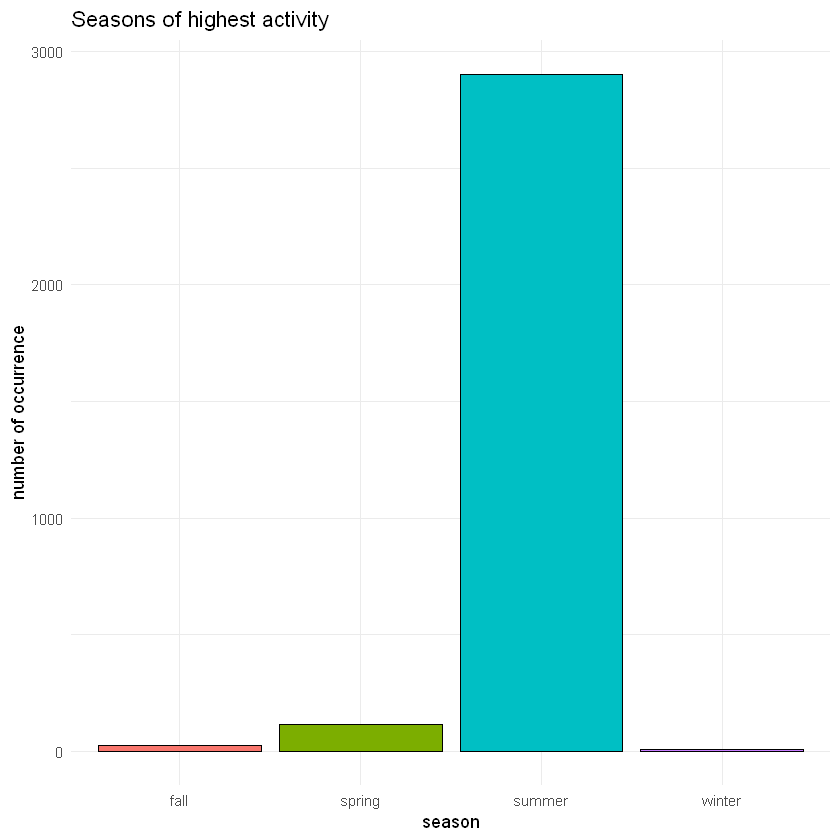

In [72]:
# Code is for running queries in SQLite
##                                   
best_time_of_year = dbGetQuery(db, "    -- The select will make a new table so that we can use it later through out the code 
                                        SELECT season, COUNT(*) AS occurance

                                        -- Creates a new table to use 
                                        FROM (
                                            SELECT
                                            place_guess,
                                                CASE 
                                                    WHEN strftime('%m', observed_date) IN ('12', '01', '02') THEN 'winter'
                                                    WHEN strftime('%m', observed_date) IN ('03', '04', '05') THEN 'spring'
                                                    WHEN strftime('%m', observed_date) IN ('06', '07', '08') THEN 'summer'
                                                    ELSE 'fall'
                                                END AS season
                                            FROM turtle_observation

                                        -- The new table that will be displayed
                                        ) AS season_table
                                        WHERE place_guess LIKE '%New Jersey%' OR place_guess LIKE '%NJ%'
                                        GROUP BY season
                                        ORDER BY occurance DESC")

best_time_of_year


ggplot(best_time_of_year,  aes(x = season, y = occurance, fill = season)) +
    geom_bar(stat = "identity", color = "black", show.legend = FALSE) +
    theme_minimal()+
    labs(title = "Seasons of highest activity",
        x = "season",
        y = "number of occurrence")


#### The best time of the year for the construction project is in the winter.

2) Determine what subset of the population (Egg, Juvennile or Adult) you believe would be most impacted.

In [73]:

#Now we will add observations where place_guess includes something LIKE New Jersey or NJ.

population = dbGetQuery(db, "SELECT 
                                COUNT(*) AS population_count,
                                CASE
                                        WHEN ofvs LIKE '%Adult%' THEN 'Adult'
                                        WHEN ofvs LIKE '%JUVENILE%' THEN 'Juvenile'
                                        WHEN ofvs LIKE '%Egg%' THEN 'Egg'
                                ELSE 'not applicable'
                                END AS stage_of_life,

                                CASE 
                                        WHEN strftime('%m', observed_date) IN ('12', '01', '02') THEN 'winter'
                                        WHEN strftime('%m', observed_date) IN ('03', '04', '05') THEN 'spring'
                                        WHEN strftime('%m', observed_date) IN ('06', '07', '08') THEN 'summer'
                                ELSE 'fall'
                                END AS stage_of_life_by_season
                                FROM turtle_observation
                                WHERE (place_guess LIKE '%New Jersey%' OR place_guess LIKE '%NJ%')
                                GROUP BY stage_of_life ")

population

population_count,stage_of_life,stage_of_life_by_season
<int>,<chr>,<chr>
597,Adult,summer
33,Egg,summer
127,Juvenile,summer
2299,not applicable,winter


#### The stubset that would be most impacted would be teh Adult population, during the summer

3) Determine the general observaiton population demographics, or range, for New Jersey terrrapins.

winter_months,occurance
<chr>,<int>
january,2
february,2
december,3


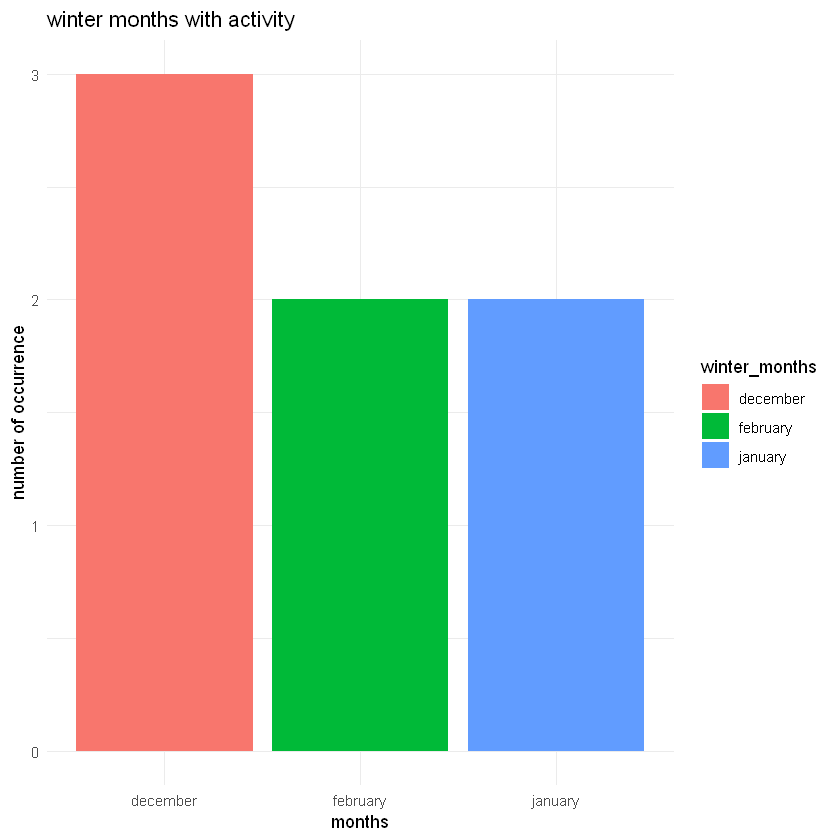

In [74]:
# Best time in the winter
# Fall seems to have the most activity so we will sort by day and draft it on teh scater plot
observations_by_month = dbGetQuery(db, "SELECT winter_months, COUNT(*) AS occurance
                                    FROM (
                                        SELECT
                                        place_guess,
                                            CASE 
                                                WHEN strftime('%m', observed_date) IN ('12') THEN 'december'
                                                WHEN strftime('%m', observed_date) IN ('01') THEN 'january'
                                                WHEN strftime('%m', observed_date) IN ('02') THEN 'february'
                                                ELSE 'not_fall'
                                            END AS winter_months
                                        FROM menhaden_observation
                                        WHERE (winter_months = 'december' OR winter_months = 'january' OR winter_months = 'february')
                                    ) AS fall_months_table
                                    WHERE place_guess LIKE '%New Jersey%' OR place_guess LIKE '%NJ%'
                                    GROUP BY winter_months
                                    ORDER BY winter_months DESC")

observations_by_month

ggplot(observations_by_month, aes(x = winter_months, y = occurance, fill = winter_months)) +
geom_bar(stat = 'identity')+
theme_minimal()+
    labs(title = "winter months with activity",
        x = "months",
        y = "number of occurrence")

### The best month in the winter is either January or February

4) Explore two other species that inhabit and utilize the saltmarsh (Examples are the Ipswich sparrow, Seaside sparrow, Saltmarsh sparrow, Atlantic menhaden, or the Mud fiddler crab and Eastern Mud snail (What terrapins eat) ) and hypothesize how they would be impacted by this construction project after you have explored their data. 
<br>
Use the data from these other two species to support your decision below. If you would like to choose another species you can, just be mindful of iNaturalist API limits. I recommend looking at the iNaturalist website and explore the different species before collecting data that you do not need.

In [75]:
## menhaden_observation

# column names for species table 
species_columns = dbListFields(db, "species")
species_columns

[1] "id"          "taxon_name"  "common_name"

In [76]:
# column names for species table 
species_columns = dbListFields(db, "menhaden_observation")
species_columns

[1] "id"            "observed_date" "day_of_year"   "place_guess"  
[5] "location"      "quality_grade" "annotations"   "tags"         
[9] "ofvs"

In [77]:
# Activity in new jersey
new_jersey_obv = dbGetQuery(db, "SELECT season, place_guess, COUNT(*) AS occurrence
                                    FROM
                                    (SELECT
                                        place_guess,
                                        CASE
                                            WHEN strftime('%m', observed_date) IN ('12', '01', '02') THEN 'winter'
                                            WHEN strftime('%m', observed_date) IN ('03', '04', '05') THEN 'spring'
                                            WHEN strftime('%m', observed_date) IN ('06', '07', '08') THEN 'summer'
                                            ELSE 'fall'
                                        END AS season
                                        FROM turtle_observation
                                        WHERE place_guess LIKE '%New Jersey%' OR place_guess LIKE '%NJ%'
                                    ) AS detailed_season
                                    GROUP BY season, place_guess
                                    ORDER BY season")

new_jersey_obv

season,place_guess,occurrence
<chr>,<chr>,<int>
fall,"Cape May County, US-NJ, US",5
fall,"New Jersey, US",23
spring,"Cape May County, US-NJ, US",26
spring,"New Jersey, US",90
spring,"Ocean County, US-NJ, US",1
summer,"Atlantic County, US-NJ, US",1
summer,"Cape May County, US-NJ, US",39
summer,"Cumberland County, US-NJ, US",2
summer,"New Jersey, US",2857


season,occurance
<chr>,<int>
fall,26
summer,18
winter,7
spring,7


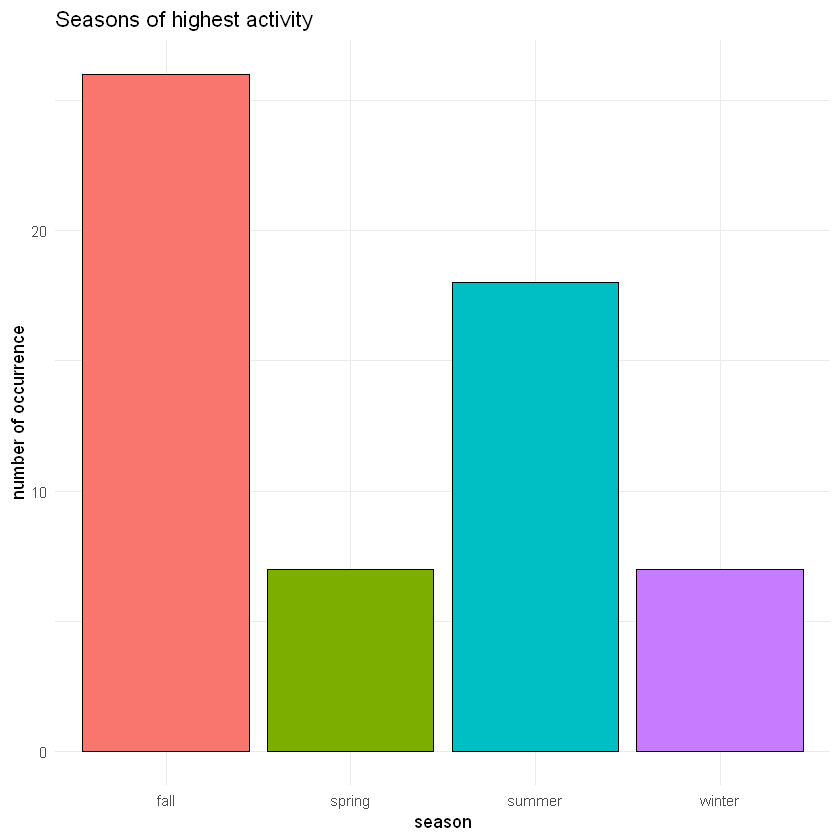

In [78]:
# best time of the year
best_time_of_year = dbGetQuery(db, "SELECT season, COUNT(*) AS occurance
                                    FROM (
                                        SELECT
                                        place_guess, 
                                            CASE 
                                                WHEN strftime('%m', observed_date) IN ('12', '01', '02') THEN 'winter'
                                                WHEN strftime('%m', observed_date) IN ('03', '04', '05') THEN 'spring'
                                                WHEN strftime('%m', observed_date) IN ('06', '07', '08') THEN 'summer'
                                                ELSE 'fall'
                                            END AS season
                                        FROM menhaden_observation
                                    ) AS season_table
                                    WHERE place_guess LIKE '%New Jersey%' OR place_guess LIKE '%NJ%'
                                    GROUP BY season
                                    ORDER BY occurance DESC
")

best_time_of_year

ggplot(best_time_of_year,  aes(x = season, y = occurance, fill = season)) +
    geom_bar(stat = "identity", color = "black", show.legend = FALSE) +
    theme_minimal()+
    labs(title = "Seasons of highest activity",
        x = "season",
        y = "number of occurrence")


### The best time of the year is to complete construction is winter or spring

winter_months,occurance
<chr>,<int>
january,2
february,2
december,3


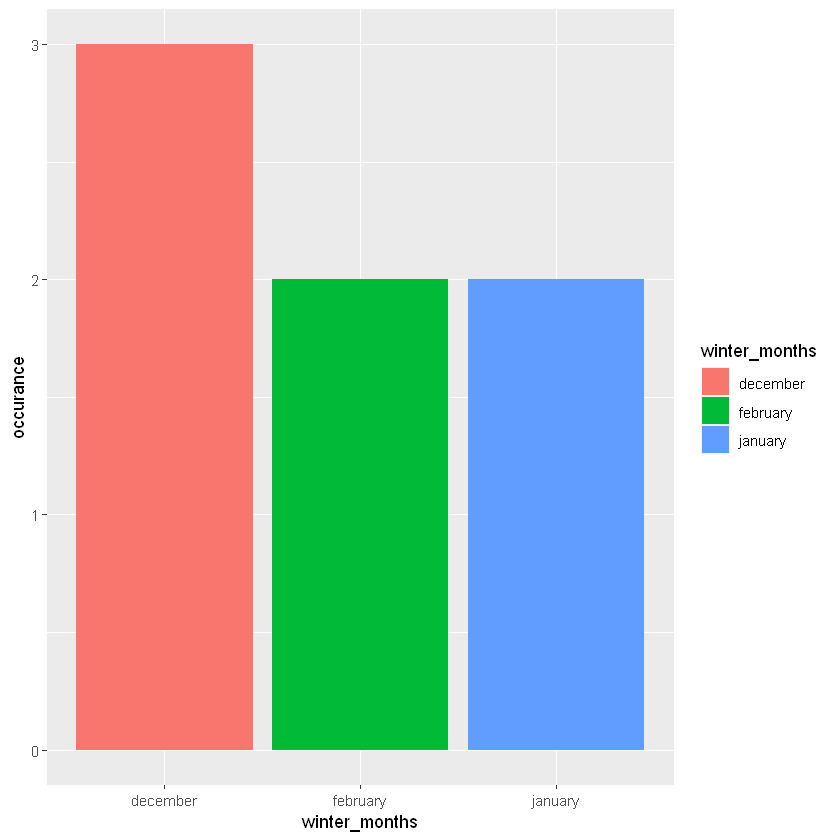

In [79]:
# Best time in the winter
# Fall seems to have the most activity so we will sort by day and draft it on teh scater plot
observations_by_month = dbGetQuery(db, "SELECT winter_months, COUNT(*) AS occurance
                                    FROM (
                                        SELECT
                                            place_guess,
                                            CASE 
                                                WHEN strftime('%m', observed_date) IN ('12') THEN 'december'
                                                WHEN strftime('%m', observed_date) IN ('01') THEN 'january'
                                                WHEN strftime('%m', observed_date) IN ('02') THEN 'february'
                                                ELSE 'not_fall'
                                            END AS winter_months
                                        FROM menhaden_observation
                                        WHERE (winter_months = 'december' OR winter_months = 'january' OR winter_months = 'february')
                                    ) AS fall_months_table
                                    WHERE place_guess LIKE '%New Jersey%' OR place_guess LIKE '%NJ%'
                                    GROUP BY winter_months
                                    ORDER BY winter_months DESC ")

observations_by_month


ggplot(observations_by_month, aes(x = winter_months, y = occurance, fill = winter_months)) +
geom_bar(stat = 'identity')

### The month with the least activity by menhaden_observations is January or Feburary

In [80]:
## sparrow_observations

# column names for species table 
species_columns = dbListFields(db, "species")
species_columns

[1] "id"          "taxon_name"  "common_name"

In [81]:
# column names for species table 
species_columns = dbListFields(db, "sparrow_observation")
species_columns

[1] "id"            "observed_date" "day_of_year"   "place_guess"  
[5] "location"      "quality_grade" "annotations"   "tags"         
[9] "ofvs"

In [82]:
# Activity in new jersey
new_jersey_obv = dbGetQuery(db, "SELECT season, place_guess, COUNT(*) AS occurrence
                                    FROM
                                    (SELECT
                                        place_guess,
                                        CASE
                                            WHEN strftime('%m', observed_date) IN ('12', '01', '02') THEN 'winter'
                                            WHEN strftime('%m', observed_date) IN ('03', '04', '05') THEN 'spring'
                                            WHEN strftime('%m', observed_date) IN ('06', '07', '08') THEN 'summer'
                                            ELSE 'fall'
                                        END AS season
                                        FROM sparrow_observation
                                        WHERE place_guess LIKE '%New Jersey%' OR place_guess LIKE '%NJ%'
                                    ) AS detailed_season
                                    GROUP BY season, place_guess
                                    ORDER BY season")

new_jersey_obv

season,place_guess,occurrence
<chr>,<chr>,<int>
winter,"Cape May County, US-NJ, US",1
winter,"New Jersey, US",9


In [83]:
best_time_of_year = dbGetQuery(db, "SELECT  season, COUNT(*) AS occurance
                                    FROM (
                                        SELECT
                                        place_guess,
                                            CASE 
                                                WHEN strftime('%m', observed_date) IN ('12', '01', '02') THEN 'winter'
                                                WHEN strftime('%m', observed_date) IN ('03', '04', '05') THEN 'spring'
                                                WHEN strftime('%m', observed_date) IN ('06', '07', '08') THEN 'summer'
                                                ELSE 'fall'
                                            END AS season
                                        FROM sparrow_observation
                                    ) AS season_table
                                    WHERE place_guess LIKE '%New Jersey%' OR place_guess LIKE '%NJ%'
                                    GROUP BY season
                                    ORDER BY occurance DESC
")

best_time_of_year


season,occurance
<chr>,<int>
winter,10


winter_months,occurance
<chr>,<int>
january,7
feburary,1
december,2


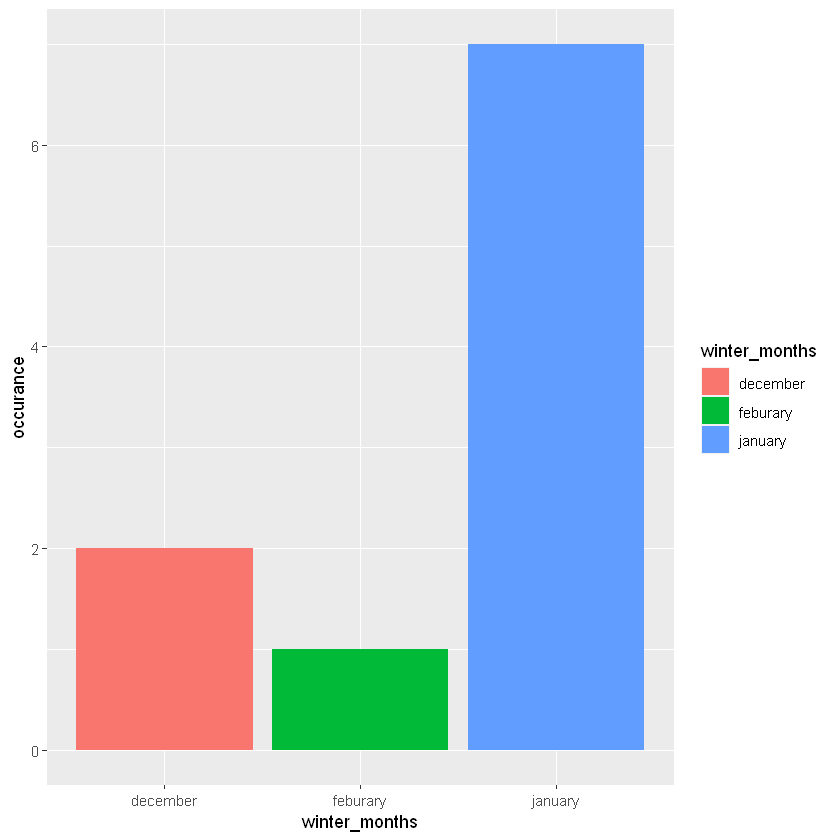

In [84]:
# Best time in the winter
# Fall seems to have the most activity so we will sort by day and draft it on teh scater plot
observations_by_month = dbGetQuery(db, "SELECT winter_months, COUNT(*) AS occurance
                                    FROM (
                                        SELECT
                                        place_guess,
                                            CASE 
                                                WHEN strftime('%m', observed_date) IN ('12') THEN 'december'
                                                WHEN strftime('%m', observed_date) IN ('01') THEN 'january'
                                                WHEN strftime('%m', observed_date) IN ('02') THEN 'feburary'
                                                ELSE 'not_fall'
                                            END AS winter_months
                                        FROM sparrow_observation
                                        WHERE (winter_months = 'december' OR winter_months = 'january' OR winter_months = 'feburary')
                                    ) AS fall_months_table
                                    WHERE place_guess LIKE '%New Jersey%' OR place_guess LIKE '%NJ%'
                                    GROUP BY winter_months
                                    ORDER BY winter_months DESC ")

observations_by_month


ggplot(observations_by_month, aes(x = winter_months, y = occurance, fill = winter_months)) +
geom_bar(stat = 'identity')

### The best month by sparrow_observation is February or December

5) Provide your overall determination approving or disproving the project with three visualizations to go along with the queried SQL data. **Breifly state why and include three graphics** - but you do not have to go into too much biology detail and there is no right or wrong answer.

### My overall determination is to approve only under the condition that the construction is completed in the winter during the month of February when there is the least amount of activity for all species. If the project bleeds into January there is a risk to not just the Northern Diamondback Terrapin but the Atlantic Menhaden and Ipswich Sparrow because activity starts to pick up for these species. 

6) State two possible reasons for results for error in your visualizations.


1) One possible error that could be caused is lack of observations. For the Ipswich Sparrow there are only observations for the winter. Which leads to question do these birds only prefer the cold climate or were they not spotted by users during this time. 
2) There is also an issue of incomplete or not enough data. For the Northern Diamondback Terrapin when classifying by Adult, Juvenile, or egg there were only results for the summer. Without getting a full picture of each season it is difficult to make an accurate decisions. 

In [85]:
#Close the database connection :)
#dbDisconnect(db)